In [ ]:
import xgboost as xgb

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

from sklearn.datasets import *
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import * 
from scipy import stats
from timeit import default_timer as timer


In [ ]:
df = pd.read_csv('train_ml2_2021.csv')
X = df.drop(columns=['target'])
y = df.target
df_test = pd.read_csv('test0.csv', index_col='obs_id')
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=1)


In [ ]:
# from sklearn.utils import class_weight
# classes_weights = class_weight.compute_class_weight('balanced',
#                                              y.unique(),
#                                              y)
# weights = np.ones(y_train.shape[0], dtype = 'float')
# for i, val in enumerate(y_train):
#     weights[i] = classes_weights[val]


# xgb_clf = xgb.XGBClassifier(random_state=123,  colsample_bytree = 0.3, learning_rate = 0.1,
#         max_depth = 5, alpha = 10, n_estimators = 200, n_jobs=-1)

# # Fit it to the training set
# xgb_clf.fit(X_train, y_train)

# # Predict the labels of the test set
# preds = xgb_clf.predict(X_val)
# preds_train = xgb_clf.predict(X_train)

# accuracy_score(y_val, preds), accuracy_score(y_train, preds_train)

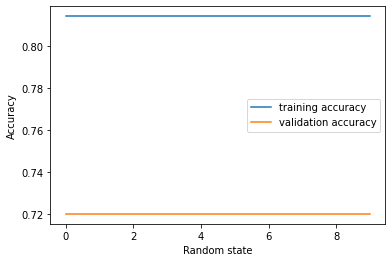

In [ ]:
n_estimators_ls = range(10)
est_train_acc = []
est_val_acc = []

for ne in n_estimators_ls:

    xgb_clf = xgb.XGBClassifier(random_state=ne, n_jobs=-1)
    # Fit it to the training set
    xgb_clf.fit(X_train, y_train)

    # Predict the labels of the test set
    preds = xgb_clf.predict(X_val)
    preds_train = xgb_clf.predict(X_train)

    est_val_acc.append(accuracy_score(y_val, preds))
    est_train_acc.append(accuracy_score(y_train, preds_train))

plt.plot(n_estimators_ls, est_train_acc, label='training accuracy')
plt.plot(n_estimators_ls, est_val_acc, label='validation accuracy')    
plt.legend()
plt.xlabel('Random state')
plt.ylabel('Accuracy')
plt.show()

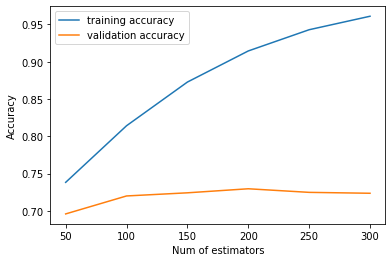

In [ ]:
n_estimators_ls = [50, 100, 150, 200, 250, 300]
est_train_acc = []
est_val_acc = []

for ne in n_estimators_ls:

    xgb_clf = xgb.XGBClassifier(random_state=123, n_estimators=ne, n_jobs=-1)
    # Fit it to the training set
    xgb_clf.fit(X_train, y_train)

    # Predict the labels of the test set
    preds = xgb_clf.predict(X_val)
    preds_train = xgb_clf.predict(X_train)

    est_val_acc.append(accuracy_score(y_val, preds))
    est_train_acc.append(accuracy_score(y_train, preds_train))

plt.plot(n_estimators_ls, est_train_acc, label='training accuracy')
plt.plot(n_estimators_ls, est_val_acc, label='validation accuracy')    
plt.legend()
plt.xlabel('Num of estimators')
plt.ylabel('Accuracy')
plt.show()

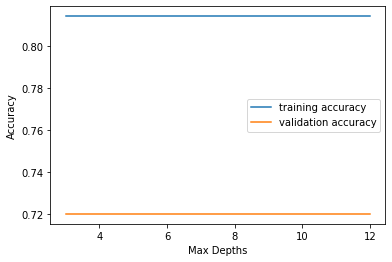

In [ ]:
depths_ls = [3,5,7,10,12]
depth_train_acc = []
depth_val_acc = []

for d in depths_ls:

    xgb_clf = xgb.XGBClassifier(random_state=123, max_depths=d, n_jobs=-1)

    # Fit it to the training set
    xgb_clf.fit(X_train, y_train)

    # Predict the labels of the test set
    preds = xgb_clf.predict(X_val)
    preds_train = xgb_clf.predict(X_train)

    depth_val_acc.append(accuracy_score(y_val, preds))
    depth_train_acc.append(accuracy_score(y_train, preds_train))


plt.plot(depths_ls, depth_train_acc, label='training accuracy')
plt.plot(depths_ls, depth_val_acc, label='validation accuracy')    
plt.legend()
plt.xlabel('Max Depths')
plt.ylabel('Accuracy')
plt.show()


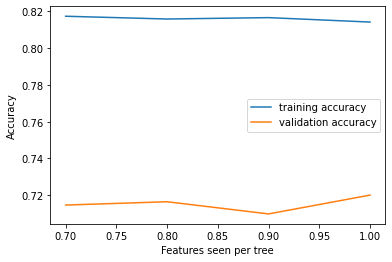

In [ ]:
colsample_bytree_ls = [0.7, 0.8, 0.9, 1.0]
colsample_bytree_train_acc = []
colsample_bytree_val_acc = []

for d in colsample_bytree_ls:

    xgb_clf = xgb.XGBClassifier(random_state=123, colsample_bytree=d, n_jobs=-1)

    # Fit it to the training set
    xgb_clf.fit(X_train, y_train)

    # Predict the labels of the test set
    preds = xgb_clf.predict(X_val)
    preds_train = xgb_clf.predict(X_train)

    colsample_bytree_val_acc.append(accuracy_score(y_val, preds))
    colsample_bytree_train_acc.append(accuracy_score(y_train, preds_train))


plt.plot(colsample_bytree_ls, colsample_bytree_train_acc, label='training accuracy')
plt.plot(colsample_bytree_ls, colsample_bytree_val_acc, label='validation accuracy')    
plt.legend()
plt.xlabel('Features seen per tree')
plt.ylabel('Accuracy')
plt.show()


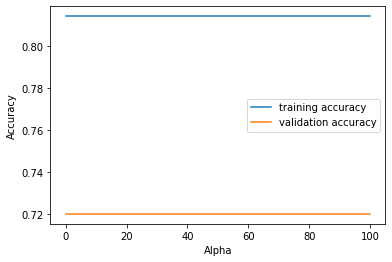

In [ ]:
alpha_ls = [0.0001, 0.001,0.01,0.1,1,10,100]
alpha_train_acc = []
alpha_val_acc = []

for d in alpha_ls:

    xgb_clf = xgb.XGBClassifier(random_state=123, alpha=d, n_jobs=-1)

    # Fit it to the training set
    xgb_clf.fit(X_train, y_train)

    # Predict the labels of the test set
    preds = xgb_clf.predict(X_val)
    preds_train = xgb_clf.predict(X_train)

    alpha_val_acc.append(accuracy_score(y_val, preds))
    alpha_train_acc.append(accuracy_score(y_train, preds_train))


plt.plot(alpha_ls, alpha_train_acc, label='training accuracy')
plt.plot(alpha_ls, alpha_val_acc, label='validation accuracy')    
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.show()


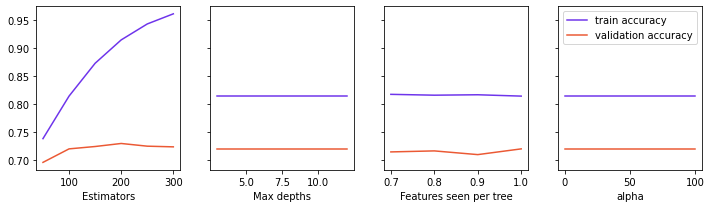

In [ ]:
hps = [n_estimators_ls, depths_ls, colsample_bytree_ls, alpha_ls]
train_acc = [est_train_acc, depth_train_acc, colsample_bytree_train_acc, alpha_train_acc]
val_acc = [est_val_acc, depth_val_acc, colsample_bytree_val_acc, alpha_val_acc]
hps_title = ['Estimators', 'Max depths', 'Features seen per tree', 'alpha']

fig, ax = plt.subplots(ncols=len(hps), nrows=1, sharey=True, figsize=(10,3))

for i, hp in enumerate(hps):
	ax[i].plot(hp, train_acc[i], label='train accuracy', c='#6e34eb')
	ax[i].plot(hp, val_acc[i], label='validation accuracy', c='#eb5934')
	ax[i].set_xlabel(hps_title[i])

	if i == len(hps)-1:
		ax[i].legend()
plt.tight_layout()
plt.show()

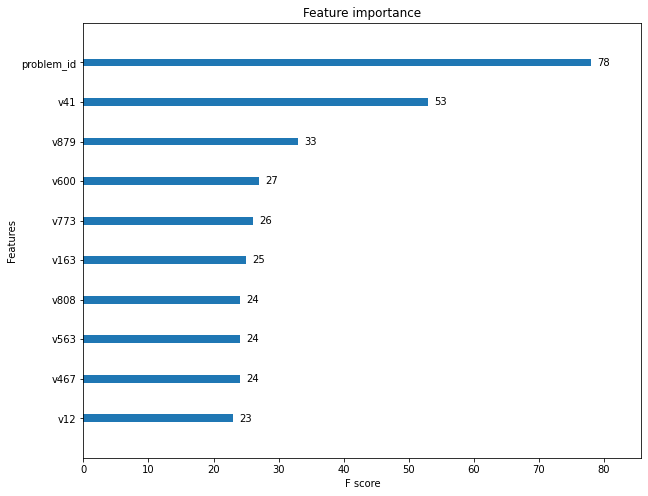

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 8)

xgb.plot_importance(xgb_clf, max_num_features=10, grid=False)
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define a parameter grid
rs_param_grid = {
    'max_depth': list((range(3,8))),
    'alpha': [0, .001, .01, .1],
    'n_estimators': [ , 150, 200, 250],
    'colsample_by_tree': [0.7, 0.8, 0.9, 1.0]
    }


# Insantiate XGBoost Clasifier 
xgb_clf = xgb.XGBClassifier(random_state=1, n_jobs=-1)

# Instantiate RandomizedSearchCV()
xgb_rs = RandomizedSearchCV(estimator=xgb_clf,param_distributions=rs_param_grid, 
                                cv=4, n_iter=8, verbose=2, random_state=123)

# Train the model on the training set
xgb_rs.fit(X, y)

# Print the best parameters and highest accuracy
print("Best parameters found: ", xgb_rs.best_params_)
print("Best accuracy found: ", xgb_rs.best_score_)

Fitting 4 folds for each of 8 candidates, totalling 32 fits
[CV] n_estimators=100, max_depth=3, colsample_by_tree=0.8, alpha=0 ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, max_depth=3, colsample_by_tree=0.8, alpha=0, total=  53.3s
[CV] n_estimators=100, max_depth=3, colsample_by_tree=0.8, alpha=0 ...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   53.3s remaining:    0.0s


[CV]  n_estimators=100, max_depth=3, colsample_by_tree=0.8, alpha=0, total=  53.8s
[CV] n_estimators=100, max_depth=3, colsample_by_tree=0.8, alpha=0 ...
[CV]  n_estimators=100, max_depth=3, colsample_by_tree=0.8, alpha=0, total=  54.2s
[CV] n_estimators=100, max_depth=3, colsample_by_tree=0.8, alpha=0 ...
[CV]  n_estimators=100, max_depth=3, colsample_by_tree=0.8, alpha=0, total=  51.9s
[CV] n_estimators=250, max_depth=5, colsample_by_tree=0.7, alpha=0 ...
[CV]  n_estimators=250, max_depth=5, colsample_by_tree=0.7, alpha=0, total= 3.5min
[CV] n_estimators=250, max_depth=5, colsample_by_tree=0.7, alpha=0 ...
[CV]  n_estimators=250, max_depth=5, colsample_by_tree=0.7, alpha=0, total= 3.6min
[CV] n_estimators=250, max_depth=5, colsample_by_tree=0.7, alpha=0 ...
[CV]  n_estimators=250, max_depth=5, colsample_by_tree=0.7, alpha=0, total= 3.6min
[CV] n_estimators=250, max_depth=5, colsample_by_tree=0.7, alpha=0 ...
[CV]  n_estimators=250, max_depth=5, colsample_by_tree=0.7, alpha=0, total= 

[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed: 97.3min finished


Best parameters found:  {'n_estimators': 250, 'max_depth': 7, 'colsample_by_tree': 1.0, 'alpha': 0}
Best accuracy found:  0.43073914153724724


In [42]:
# make final prediction

model = xgb.XGBClassifier(**{'n_estimators': 250, 'max_depth': 7, 'colsample_by_tree': 1.0, 'alpha': 0})
model.fit(X, y)



XGBClassifier(alpha=0, base_score=0.5, booster='gbtree', colsample_by_tree=1.0,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=250, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [44]:

final_pred = model.predict(df_test.drop(columns='target'))

submission_xgboost = pd.DataFrame(np.array(final_pred).T, columns=['target'])
submission_xgboost.to_csv('submission_xgboost', index_label='obs_id')
